In [1]:
import scanpy as sc
import os
import scvi
os.chdir("/data/TAK_981")

In [2]:
adata = sc.read_h5ad("h5ad/batch_corrected.h5ad")
adata = adata.raw.to_adata()
adata = adata[adata.obs.annot == "Macrophages"]
adata.layers["counts"] = adata.X.copy()
adata.raw = adata.copy()

/tmp/ipykernel_9578/1149065737.py:4: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()


In [3]:
scvi.data.poisson_gene_selection(adata, layer='counts', n_top_genes=10000,
                                 subset=True, batch_key="sample_id")

/home/ubuntu/miniconda3/envs/scanpy/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
sc.pp.neighbors(adata, use_rep="X_scVI",)
sc.tl.umap(adata, min_dist=0.1)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=0.6)

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [6]:
adata.write_h5ad("h5ad/subtyping/macrophages.h5ad")

In [7]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon",
                        pts=True, use_raw=False)
df = sc.get.rank_genes_groups_df(adata, group=None)

In [8]:
df.to_csv("csv/subtyping/wilcox_markers_macrophages.csv")

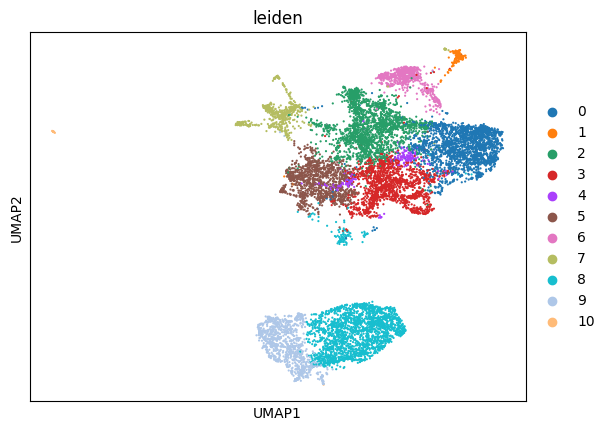

In [9]:
sc.pl.umap(adata, color="leiden", use_raw=False)

In [10]:
annot = {"0": "TAM",
         "1": "TAM",
         "2": "TAM",
         "3": "TAM",
         "4": "TAM",
         "5": "TAM",
         "6": "CD103+ cDC",
         "7": "M1",
         "8": "M1",
         "9": "TAM",
         "10": "TAM",
         "11": "TAM",
         "12": "M1"}

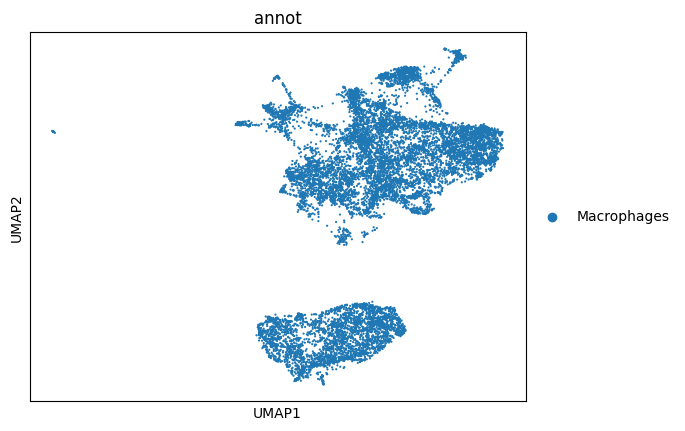

In [11]:
sc.pl.umap(adata, color="annot", use_raw=False)

In [12]:
adata.obs["annot"] = adata.obs["leiden"].map(annot)

In [13]:
adata.write_h5ad("h5ad/subtyping/macrophages.h5ad")

In [14]:
ad_full = sc.read_h5ad("h5ad/batch_corrected.h5ad")

In [15]:
dcs = adata[adata.obs.annot == "CD103+ cDC"]

In [ ]:
ad_full.annot = ad_full.obs.annot.astype(str)
ad_full.obs.annot=ad_full.obs.annot.cat.add_categories("CD103+ cDC")
ad_full.obs.loc[dcs.obs.index, "annot"] = "CD103+ cDC"

In [ ]:
ad_full.write_h5ad("h5ad/batch_corrected.h5ad")